# Bibliothèques utiles en Sciences

## Les deux librairies de base : numpy et matplotlib

*   [**numpy**](https://numpy.org/)
  
  Pour travailler avec des données numériques (tableaux, fonctions mathématiques de base, nombres aléatoires, ...)

In [ ]:
import numpy as np

x = np.array((4,5,6,7,3,5))


*   [**matplotlib**](https://matplotlib.org/)

  Pour faire des graphiques ([exemples](https://matplotlib.org/stable/gallery/index))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,10, 100)
y = np.sin(x)

plt.plot(x,y)
plt.show()

## Trois librairies spécialisées : sympy, scipy et pandas

*   [**sympy**](https://www.sympy.org/)

  Calcul symbolique (genre Mathematica)

In [ ]:
import sympy as sp
x = sp.symbols('x')

sp.integrate(sp.exp(x)*sp.sin(x), x)

In [ ]:
x, a, b, c = sp.symbols('x a b c')
sp.solve(a*x**2 + b*x + c, x)

*   [**scipy**](https://scipy.org/)

  Outils de calcul scientifique (intégrateurs nunériques, algorithmes d'optimisation, constantes physiques, FFT, fonctions spéciales, ...)

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/constants.html
import scipy.constants as cst
print(cst.g)
print(cst.physical_constants["electron mass"])

* [**pandas**](https://pandas.pydata.org/)

  Outils avancés d'analyse de données (équivalent d'Excel)

  https://pandas.pydata.org/docs/user_guide/10min.html#min

## Faire des animations en 3D : vpython-glowscript

**vpython (IDE et Jupyter)** : https://vpython.org/

**vpython web (glowscript)** : https://glowscript.org/

Introduction

1.   [Générale](https://www.glowscript.org/docs/VPythonDocs/VisualIntro.html)
2.   [Trinket](https://matter-interactions.trinket.io/00_welcome_to_vpython#/welcome-to-vpython/what-is-trinket)

Exemples tirés de la [galerie vpython](https://www.glowscript.org/#/user/GlowScriptDemos/folder/Examples/)

1.   [Sytème d'étoiles binaire](https://www.glowscript.org/#/user/GlowScriptDemos/folder/Examples/program/BinaryStar-VPython)
2.   [Pendule double](https://www.glowscript.org/#/user/GlowScriptDemos/folder/Examples/program/DoublePendulum-VPython)
3. [Distribution de Maxwell-Boltzmann dans un gas](https://www.glowscript.org/#/user/GlowScriptDemos/folder/Examples/program/HardSphereGas-VPython)

# Faire des graphiques

Bibiothèque d'exemples : https://matplotlib.org/stable/gallery/index

## Graphique d'une fonction mathématique

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,10, 100)
y = np.sin(x)

plt.plot(x,y)
plt.show()

Noms des axes avec xlabel() et ylabel().



Titre de graphique avec title()

Plusieurs courbes et légende.

Changer la couleur et la composition des courbes.

## Nuage de points de données expérimentales

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.title("Un nuage de points")

# Données fictives, choisies au hasard
x = np.random.randn(500)
y = np.random.randn(500)

# Affichage des données sur un graphique
plt.scatter(x, y)

plt.xlabel("x")
plt.ylabel("y")

plt.show()

## Les barres d'erreur

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)

plt.errorbar(x, y, yerr=0.1)
plt.show()

## Importer les données d'un CSV

1.   Avec open()
2.   Avec numpy.loadtxt()

**La fonction open()**

https://colab.research.google.com/github/computationalcore/introduction-to-python/blob/master/notebooks/4-files/PY0101EN-4-2-WriteFile.ipynb

Écriture d'un fichier csv.

In [ ]:
import numpy as np

x = np.linspace(0,10, 50)

with open("racine_carree.csv","w") as f:
    for n in x:
        f.write(f"{n}, {np.sqrt(n)}\n")

Lecture d'un csv.

In [ ]:
with open("racine_carree.csv","r") as f:
    print(f.read())

Traitement de l'information "brute" et graphique.

In [ ]:
# Le document est ouvert et lu
with open("racine_carree.csv", "r") as f:
    lignes = f.read().splitlines()

# Tableaux vides, pour stocker les données
nb_lignes = len(lignes)
nombres = [0.0] * nb_lignes
racines = [0.0] * nb_lignes

# Boucles sur toutes les lignes pour placer les données dans des variables
for i in range(nb_lignes):
    ligne = lignes[i]                # Copie de la ligne actuelle
    colonnes = ligne.split(",")     # Séparation en colonnes
    nombres[i] = float(colonnes[0])  # La première colonne est x
    racines[i] = float(colonnes[1])  # La seconde est sqrt(x)

# Affichage à la console
#for i in range(nb_lignes):
#    print(nombres[i], racines[i])

# Graphique
import numpy as np
import matplotlib.pyplot as plt
plt.plot(np.array(nombres), np.array(racines))
plt.xlabel("x")
plt.ylabel(r"$\sqrt{x}$", rotation=0)
plt.show()

**La fonction numpy.loadtxt()**

https://likegeeks.com/numpy-loadtxt-tutorial/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("racine_carree.csv", delimiter=',')

plt.plot(data[:,0], data[:,1])
plt.xlabel("x")
plt.ylabel(r"$\sqrt{x}$", rotation=0)
plt.show()

## 2.5 [EXTRA] Graphiques interactifs dans un notebook

In [ ]:
# Pour des graphiques interactifs
%matplotlib ipympl
from google.colab import output
output.enable_custom_widget_manager()

Si le bloc précédent échoue, exécuter ce qui suit.

In [ ]:
%pip install ipympl

Une barre d'outils apparaît sur le côté du graphique une fois tracé.

# Courbes de tendance

1.   Courbes de tendance polynomiale avec **numpy.polyfit()**
2.   Courbes de tendance personnalisées avec **scipy.optimize.curve_fit()**

## Tendance polynomiale avec **numpy.polyfit()**

La fonction polyfit() permet de tracer des courbes de tendance polynomiales (linéaire, quadratique, etc.).

Par exemple, si on mesure la force résultant de l'étirement d'un ressort, nous obtenons une droite $F_R=k \Delta x$ équivalente à $y = ax + b$. La pente de la droite permet d'obtenir la constante de rappel.

In [ ]:
import numpy as np

etirement_m = np.array([0.0, 0.01, 0.02, 0.03, 0.04, 0.05])
force_N = np.array([0.0, 0.11, 0.29, 0.41, 0.50, 0.67])

z = np.polyfit(etirement_m, force_N, 1)

print(f"a = {z[0]}")
print(f"b = {z[1]}")

La fonction poly1d() permet de créer une fonction à partir des paramètres obtenus.

In [ ]:
z = np.polyfit(etirement_m, force_N, 1)
fit = np.poly1d(z)

 Nous pouvons maintenant tracer la courbe de tendance avec les données expérimentales.

In [ ]:
import matplotlib.pyplot as plt
plt.title("Mesure expérimentale de l'étirement d'un ressort.")
plt.scatter(etirement_m, force_N, label="mesures")
plt.plot(etirement_m, fit(etirement_m), color="r", label=f"{fit}")
plt.xlabel("Étirement (m)")
plt.ylabel("Force de rappel (N)")
plt.legend()
plt.show()

## Tendance personnalisées avec **scipy.optimize.curve_fit()**

La fonction curve_fit() du module scipy.optimize permet de définir une courbe de tendance à partir d'une fonction mathématique personnalisée. Elle permet aussi d'obtenir l'incertitude sur les paramètres de la courbe obtenue.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Données expérimentales fictives
n = 30
x_exp = np.linspace(-0.5,3*np.pi,n)
y_exp = np.sin(x_exp) + 0.2*(0.5 - np.random.random(n))

In [ ]:
# Courbe de tendance
def modele(x, A, w):
    return A*np.sin(w*x)

z,cov = curve_fit(modele, x_exp, y_exp)

In [ ]:
# Graphique
plt.plot(x_exp, y_exp, "o", label="expérimental")

# courbe de tendance
x = np.linspace(-0.5,3*np.pi,200)
plt.plot(x, modele(x,*z), label=f"{z[0]:.3}*sin({z[1]:.3}*x)")

plt.xlabel("x")
plt.ylabel("y")

plt.legend()
plt.show()

Incertitude sur la valeur des paramètres trouvés

In [ ]:
incertitude = np.sqrt(np.diag(cov))
print(f"A = {z[0]:.3f} \u00B1 {incertitude[0]:.3}")
print(f"w = {z[1]:.3f} \u00B1 {incertitude[1]:.3}")

## [EXTRA] Courbes de tendance avec barres d'erreur.

https://scipy-cookbook.readthedocs.io/items/FittingData.html#Fitting-a-power-law-to-data-with-errors

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

# Méthodes numériques de base

1.   **Méthode de Newton** : trouver les racines d'une équation
2.  **Intégration numérique** : simuler le mouvement

## Méthode de Newton

La méthode (numérique) de Newton permet de trouver les racines d'une fonction.

https://fr.wikipedia.org/wiki/M%C3%A9thode_de_Newton

Trouver la racine de $x - \cos(x) = 0$.

In [ ]:
from scipy.optimize import newton

sol = newton(fonction, 0.0)
print(sol)

Trouver les deux racines de l'équation $x^2 - 1 = 0$.

In [1]:
from scipy.optimize import newton


Un bloc sur un plan incliné avec frottement. Les paramètres sont $\mu = 0,4$ et $m = 0,5$ kg. Quel angle $\theta$ doit avoir le plan incliné pour que l'accélération soit $4,9$ m/s$^2$ ?

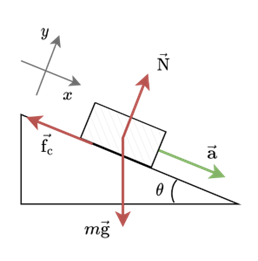

$N - mg \cos\theta = 0 $

$mg\sin\theta -\mu N = ma$

En combinant les deux équations :

$\sin\theta -\mu \cos\theta = \frac{a}{g}$

In [5]:
from scipy.optimize import newton
import numpy as np

def fonction(x):
    return

theta = newton(fonction, 0.0)

print(theta)


0.8629254641222887


## Intégration numérique

Équations de base:

- $a = \frac{1}{m}\sum F$

- $\frac{dv}{dt} = a$

- $\frac{dx}{dt} = v$

Méthode d'Euler-Cromer

1.   Calculer l'accélération au temps $t$
2.   Calculer la vitesse au temps $t + \Delta t$ avec $a(t)$

$$v(t+\Delta t) = v(t) + a(t)\Delta t$$

3. Calculer la position au temps $t + \Delta t$ avec $v(t+\Delta t)$

$$x(t+\Delta t) = x(t) + v(t+\Delta t)\Delta t$$

```python
# Valeurs initiales
x[0] = ...
v[0] = ...

# Marche temporelle
for i in range(0, N):
    a[i] = [somme des forces]
    v[i + 1] = v[i] + a[i]*dt
    x[i + 1] = x[i] + v[i + 1]*dt
```

Une voiture allant en ligne droite et ayant une vitesse initiale de 2,5 m/s accélère à raison de 5 m/s$^2$. Quelle sera sa vitesse et la distance parcourue 4 secondes plus tard?

In [ ]:
import numpy as np

# Paramètres du problème
ti = 0.0
tf = 4.0
xi = 0.0
vi = 2.5
ai = 5.0

# L'axe du temps
N = 10
dt = (tf - ti)/N
t = np.arange(ti, tf + dt, dt)

# Tableaux vides de positions et de vitesses
x = np.zeros(N + 1)
v = np.zeros(N + 1)
a = np.zeros(N + 1)

# Valeurs initiales
x[0] = xi
v[0] = vi
a[0] = ai

# Marche temporelle
for i in range(0, N):
    a[i] = ai
    v[i + 1] = v[i] + a[i]*dt
    x[i + 1] = x[i] + v[i + 1]*dt

# Affichage de la solution
print(f"Position finale : {x[-1]:.3f} m")
print(f"Vitesse finale  : {v[-1]:.3f} m/s")


# Sujets avancés

## Le pendule : du mouvement harmonique au chaos

### Le modèle mathématique



En présence de frottement, le pendule forcé est décrit par l'équation différentielle suivante:
$$ \frac{d^2\theta}{dt^2} =  -\omega_n^2\sin \theta -\gamma \frac{d\theta}{dt}
   + A\cos(\omega_A t), $$
où $\omega_n$ est la fréquence angulaire naturelle du pendule, $\gamma$ est la constante d'amortissement, $A$ l'amplitude associée à la force d'entraînement qui oscille à la fréquence angulaire $\omega_A$.

Ce modèle mathématique, en apparence simple, ne possède pas de solution mathématique générale.

Afin d'en faire l'étude numérique, l'équation du second ordre ici-haut est exprimée en termes de deux équations du premier ordre ainsi

\begin{eqnarray*}
\frac{d\theta}{dt} &=& \omega \\
\frac{d\omega}{dt} &=& -\omega_n^2\sin\theta - \gamma\omega + A\cos(\omega_A t)
\end{eqnarray*}

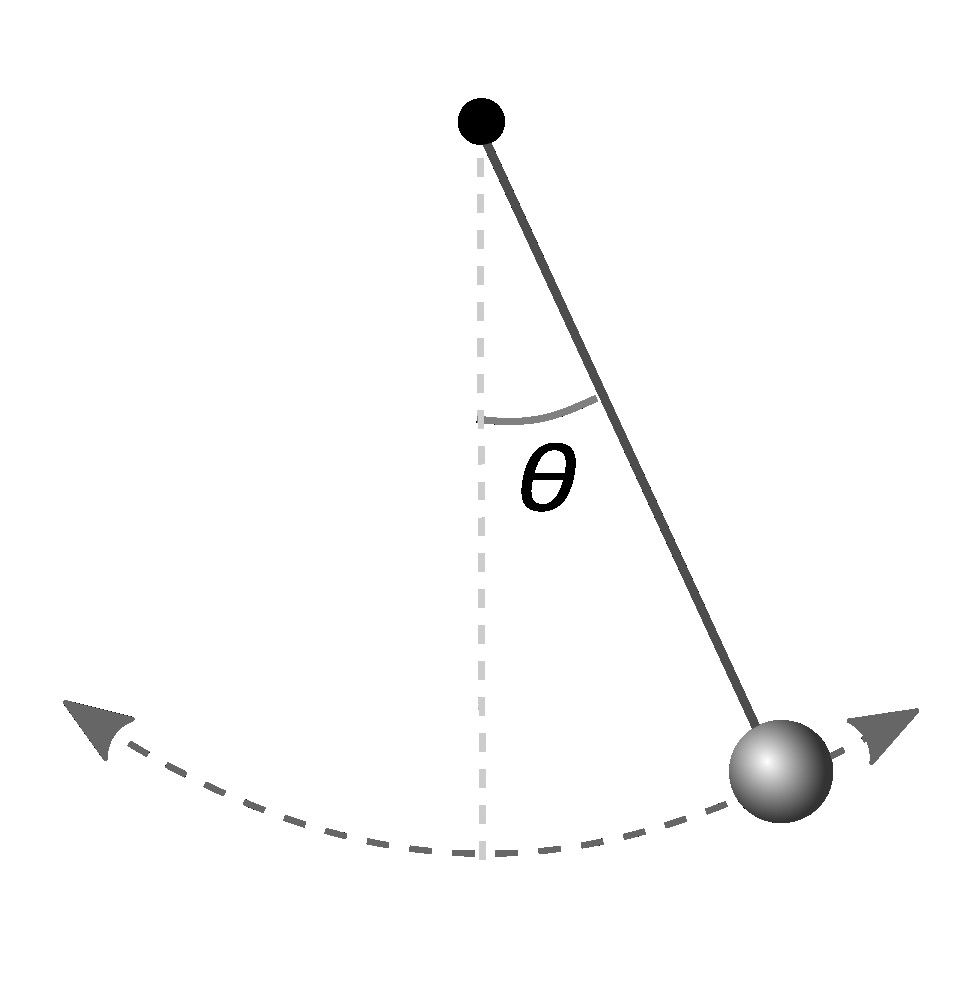


### Le programme de base (**à exécuter avant d'aller plus loin**)

Pour automatiser la résolution des équations différentielles ici-haut, nous avons utilisé les fonctionnalités d'intégration numérique de la bibliothèque scipy (scipy.integrate). Pour vous permettre d'explorer facilement les différents paramètres, nous avons créé la fonction "resoudre" et la fonction "afficher_resultats".

Note : les fonctions trigonométriques en Python utilisent des angles en radians. Les fonctions *deg2rad* et *rad2deg* sont utilisées pour pouvoir travailler avec des angles en degrés.

In [ ]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

# Fonction définissant les équations différentielles que nous voulons résoudre.
# u[0] correspond à l'angle theta et u[1] correspond à la vitesse angulaire omega.
def eqs(u, t, omega_n, gamma, A, omega_A):
    theta = u[0]
    omega = u[1]
    return (omega, -omega_n**2*np.sin(theta) - gamma*omega + A*np.cos(omega_A*t))

# Fonction qui automatise la résolution du problème en fonction
# des paramètres qui lui sont donnés
def resoudre(tmax, theta_0, omega_0, omega_n, gamma, A, omega_A):
    t = np.linspace(0, tmax, int(500*tmax*omega_n))
    u0 = np.array([np.deg2rad(theta_0), np.deg2rad(omega_0)])
    theta, omega = integrate.odeint(eqs, u0, t, args=(omega_n, gamma, A, omega_A) ).T
    return (np.rad2deg(theta), np.rad2deg(omega), t) #

# Fonction qui trace les résultats obtenus avec la fonction resoudre()
def afficher_resultats(t, theta, omega):
    plt.figure(figsize=(6,3))
    plt.subplot(221)
    plt.plot(t, theta)
    plt.ylabel(r"$\theta(t)$")

    plt.subplot(223)
    plt.plot(t, omega)
    plt.ylabel(r"$\omega(t)$")
    plt.xlabel(r"$t$")

    plt.subplot(122)
    plt.plot(theta, omega)
    plt.plot(theta[0], omega[0], 'o', color='green')
    plt.plot(theta[-1], omega[-1], 'o', color='red')
    plt.xlabel(r"$\theta(t)$")
    plt.ylabel(r"$\omega(t)$")

    plt.tight_layout()

### Exemple : mouvement harmonique simple

Pour un petit angle de départ, en l'absence de frottement ($\gamma = 0$) et de force d'entraînement ($A = 0$), le mouvement de pendule est décrit par le mouvement harmonique simple, qui sont des oscillations sinusoïdales. Les courbes présentées ici-bas ont été obtenues en effectuant la résolution numérique du modèle mathématique présenté ici-haut.

Les graphiques de gauche montrent l'angle du pendule $\theta$ et la vitesse angulaire $\omega$ en fonction du temps.

Le graphique de droite représente l'espace de phase, qui met en relation $\theta(t)$ et $\omega(t)$. Sous cette représentation, le mouvement harmonique est représenté par une ellipse. L'état initial du pendule est indiqué par le point vert, l'état final est en rouge.

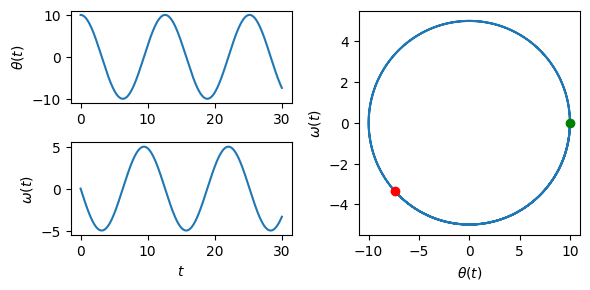

In [ ]:
t_sim = 30.0       # Temps total de simulation (secondes)
theta_0 = 10.0     # angle initial du pendule (degrés)
omega_0 = 0.0      # vitesse angulaire initiale du pendule (degrés par seconde)
omega_n = 0.5      # vitesse angulaire naturelle du pendule (degrés par seconde)
gamma = 0.0        # paramètre d'amortissement
A = 0.0            # amplitude de la force d'entraînement
omega_A = 0.0      # vitesse angulaire de la force d'entraînement

theta, omega, t = resoudre(t_sim, theta_0, omega_0, omega_n, gamma, A, omega_A)
afficher_resultats(t, theta, omega)

### Exploration 1 : au-delà des petits angles

La description de la dynamique du pendule en termes de mouvement harmonique simple est valable uniquement lorsque le mouvement est de petite amplitude.

À l'aide de ce programme

In [ ]:
theta_0 = 0.0
omega_0 = 0.0

theta, omega, t = resoudre(30.0, theta_0, omega_0, 1.0, 0.0, 0.0, 0.0)
afficher_resultats(t, theta, omega)

explorez les situations suivantes.

1.   Pour une vitesse angulaire initiale nulle ($\omega_0 = 0$), explorer les angles initiaux $\theta_0$ entre $0$ et $180^o$.
Êtes-vous capables d'expliquer qualitativement ce que vous observez?
Qu'arrive-t-il à la période d'oscillation lorsque l'angle initial $\theta_0$ augmente?

2.   Pour un angle initial nul ($\theta_0 =0$), faites varier la vitesse angulaire initiale du pendule $\omega_0$. Que se passe-t-il lorsque cette dernière est supérieure ou égale à $114,6$ $^o$/seconde ?



### Exploration 2 : mouvement amorti

Un pendule réel non forcé ($A = 0$) s'arrêtera toujours après un certain temps. Cet effet est introduit dans le modèle par le paramètre $\gamma$. Plus sa valeur est grande, plus le pendule s'arrête rapidement. Vous pouvez explorer ce phénomène à l'aide du programme suivant.

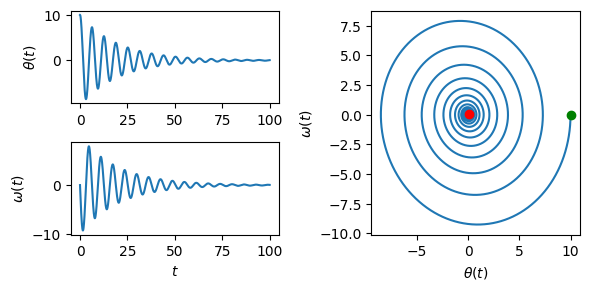

In [ ]:
gamma = 0.1

theta, omega, t = resoudre(100.0, 10.0, 0.0, 1.0, gamma, 0.0, 0.0)
afficher_resultats(t, theta, omega)

À partir de quelle valeur de $\gamma$ les oscillations disparaissent-elles complètement?

### Exploration 3 : mouvement forcé

En présence d'une force d'entraînement, un pendule au repos se mettra à osciller avec une amplitude de plus en plus grande. Le mouvement se stabilise lorsque l'énergie absorbée s'équilibre avec l'énergie dissipée par le frottement.

In [ ]:
t_sim = 60.0
A = 0.1
omega_A = 1.0

theta, omega, t = resoudre(t_sim, 0.0, 0.0, 1.0, 0.1, A, omega_A)
afficher_resultats(t, theta, omega)

Dépendamment des conditions de départ, avant de se stabiliser le pendule peut avoir une période transitoire un peu bizarre, due aux effets non-linéraires introduits par le $\sin\theta$. Voici quelques exemples.

In [ ]:
theta, omega, t = resoudre(20.0, 0.0, 0.0, 1.0, 0.1, 2.0, 3.0)
afficher_resultats(t, theta, omega)

In [ ]:
theta, omega, t = resoudre(30.0, 5.0, 0.0, 1.0, 0.5, 0.4, 4.5)
afficher_resultats(t, theta, omega)

In [ ]:
theta, omega, t = resoudre(100.0, 5.0, -10.0, 1.0, 0.5, 0.1, 0.2)
afficher_resultats(t, theta, omega)

Essayez différentes combinaisons de paramètres et observez par vous-même la richesse de la dynamique.

### Exploration 4 : mouvement chaotique

La présence d'effets non-linéaires (le $\sin\theta$), de frottement ($\gamma\neq 0$) et d'une force d'entraînement réunissent les conditions nécessaires pour obtenir un mouvement chaotique. En situation de chaos, la dynamique du pendule ne se stabilise pas en un mouvement d'oscillation régulier. Le pendule change plutôt constamment de direction de manière imprévisible.

Le programme suivant montre une situation pour laquelle le pendule effectue un mouvement chaotique.


In [ ]:
theta, omega, t = resoudre(600.0, 17.99, 45.84, 1.0, 0.2, 0.52, 0.697)

plt.figure(figsize=(6,4))

plt.subplot(211)
plt.plot(t, theta)
plt.xlabel(r"$t$")
plt.ylabel(r"$\theta(t)$")

plt.subplot(212)
plt.plot(theta, omega)
plt.plot(theta[0], omega[0], 'o', color='green')
plt.plot(theta[-1], omega[-1], 'o', color='red')
plt.xlabel(r"$\theta(t)$")
plt.ylabel(r"$\omega(t)$")

plt.tight_layout()

Réutilisez ce programme pour observer la sensibilité du mouvement chaotique à la valeur des différents paramètres de départ.

1. Diffraction

## Transformation de Fourier rapide: diffraction de la lumière par une petite ouverture

La transformation de Fourier est une opération mathématique qui permet de trouver la composition en fréquence d'une fonction. C'est un outil très utilisé en physique et en ingénierie. La forme optimisée pour le calcul numérique est appelé Transformation de Fourier *rapide*.

https://fr.wikipedia.org/wiki/Transformation_de_Fourier
https://fr.wikipedia.org/wiki/Transformation_de_Fourier_rapide

En optique, le patron de diffraction créé par une ouverture est donné, dans la limite de Fraunhofer, par la transformation de Fourier de cette ouverture.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift


# Fonction représentant l'ouverture
largeur = 10  # Largeur de la fente
N = 512  # Nombres de points de discrétisation

ouverture = np.zeros(N)
ouverture[N//2 - largeur//2:N//2 + largeur//2] = 1

# Calcul du patron de diffraction
diffraction = np.abs(fftshift(fft(ouverture)))**2

# Graphique
plt.subplot(211)
plt.plot(ouverture)

plt.subplot(212)
plt.plot(diffraction)
plt.show()

## Simulation Monte-Carlo : modéliser la désintégration nucléaire à l’aide de nombres aléatoires

Une simulation Monte-Carlo est une approche en physique qui consiste à résoudre un problème à l'aide de nombres aléatoires. Le plus souvent, ces nombres aléatoires sont utilisés pour faire l'approximation numérique d'intégrales ou reproduire le comportement de la matière aux échelles atomiques.

Nous vous proposons ici deux exemples pour :

1.   trouver $\pi$
2.   modéliser la désintégration radioactive

### Trouver $\pi$ avec des nombres aléatoires

https://towardsdatascience.com/estimate-pi-using-random-numbers-8b13a7e8c791

Un cercle de rayon unitaire ($R = 1$) est placé au centre d'un carré dont les côtés sont de longueur $2R$. Ensuite nous prenons le rapport des aires de ces deux formes géométriques:

$$\frac{Aire\, du\, cercle}{Aire\, du\, carré} = \frac{\pi R^2}{4 R^2} = \frac{\pi}{4}$$

Des nombres aléatoires entre 0 et 1 définissent des positions $(x,y)$ au hasard dans le plan cartésien. Le nombre de points qui se retouvent dans le cercle ($x^2 + y^2 \leq 1$) est proportionnel à l'aire de ce cercle. Cela permet d'estimer $\pi$ ainsi:

$$\pi \simeq 4\frac{Nombre\, de\, points\, dans\, le\, cercle}{Nombre\, total\, de\, points}$$

Version avec boucle *for*.

In [ ]:
import numpy as np

N = int(1e6)
N_cercle = 0

for i in range(N):
    rand = np.random.random(2)
    r_carre = rand[0]**2 + rand[1]**2
    if r_carre <= 1:
        N_cercle += 1

pi = 4 * N_cercle / N

print("Estimation de Pi=", pi)

Voici une version "vectorisée".

In [ ]:
import numpy as np

N = int(1e7)

rand = np.random.random((2,N))
r_carre = np.linalg.norm(rand, axis=0)
N_cercle = np.sum(r_carre <= 1.0)

pi = 4 * N_cercle / N

print("Estimation de Pi=", pi)

### Modélisation de la désintégration readioactive

La désintégration radioactive est un processus spontané qui peut être modélisé à l'aide de nombres aléatoires.

En commençant avec un certain nombre d'atomes $N_0$, un nombre aléatoire est tiré pour chaque atome, à chaque pas de temps $\Delta t$. Si ce nombre est inférieur à la probabilité que atome se désintègre, cet atome est retiré. L'opération est reproduite pour chaque atome et à chaque pas de temps.

Dans la limite où le nombre initial d'atomes est très grand ($N_0 → \infty$) et le pas de temps est infinitésimal ($\Delta t → 0$), le modèle aléatoire reproduit le modèle continu:

$$N(t) = N_0 e^{-\lambda t}$$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

N0 = 20 # Nombre d'atomes
lamb = 0.0001 # Activité (désintégrations/s)

max_t = 5.0/lamb
M = 100
dt = max_t/M
t = np.arange(0, M + 1)*dt
p = lamb*dt # "probabilité" de désintégration durant l'intervalle dt

# Tableau contenant le nombre d'atomes actifs à chaque pas de temps
N = np.zeros(len(t), dtype = int)
N[0] = N0

for j in range(1, M + 1): # Boucle temporelle
    nd = 0 # Nombre de désintégrations réelles sur dt
    for i in range(0, N[j - 1]): # Boucle sur le nombre d'atomes actifs
        if np.random.random() < p: # si le nombre aléatoire est inférieur à p, il y a désintégration spontanée.
            nd += 1

    N[j] = N[j-1] - nd # Nombres d'atomes actifs restants pour la prochaine étape.

plt.plot(t, N, label="modèle aléatoire")
plt.plot(t, N0*np.exp(-lamb*t), label="modèle continu")
plt.legend()
plt.show()